In [1]:
import pandas as pd
#load adult.csv to dataframe
df = pd.read_csv('adult.csv')

In [2]:
from sklearn.model_selection import train_test_split
#select dataframe for input X
X = df.drop(['target'],axis=1)
#select dataframe for target y
y = df['target']
#split feature to train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
#import DicVectorizer for encoding categorical features
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

#convert dataframe to dictionary
dicts_for_my_training_data = X_train.to_dict('records')
dicts_for_my_test_data = X_test.to_dict('records')

#fit train and test to DictVectorizer
X_train_encoded = dv.fit_transform(dicts_for_my_training_data)
X_test_encoded = dv.transform(dicts_for_my_test_data)

In C:\Users\RUSEN\.conda\envs\cs245\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\RUSEN\.conda\envs\cs245\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\RUSEN\.conda\envs\cs245\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\RUSEN\.conda\envs\cs245\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\RUSEN\.conda\envs\cs245\lib\site-packages\matplo

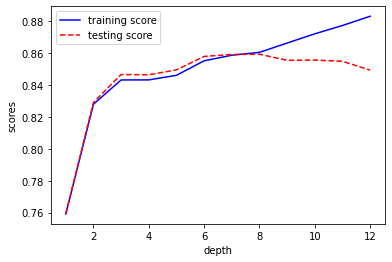

In [4]:
#build DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
depth_range = range(1,13)
train_acc = []
test_acc = []
for max_depth in depth_range :
  tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
  tree.fit(X_train_encoded, y_train)
  train_acc.append(tree.score(X_train_encoded, y_train))
  test_acc.append(tree.score(X_test_encoded, y_test))

#plot DecisionTreeClassifier accuracy from max_dept 1 to 12
plt.plot(depth_range, train_acc, color="blue", linestyle="solid", label="training score")
plt.plot(depth_range, test_acc, color="red", linestyle="dashed", label="testing score")
plt.xlabel("depth")
plt.ylabel("scores")
plt.legend()
plt.show()

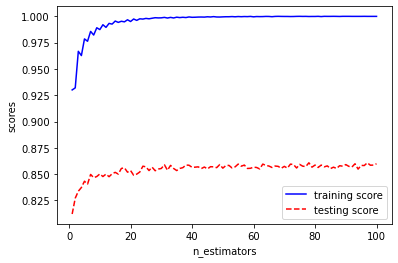

'\nข้อ1 เหตุใดผลของการใช้decision tree และ random forest ที่มีจำนวนต้นไม้เพียง 1 ต้นจึงต่างกัน\nคำตอบ: random forest ให้ค่าความแม่นยำ(score หรือ accuracy) ดีกว่า decision tree เนื่องจากเรื่องจำนวน features ที่ใช้\nrandom forest จะใช้ตามจำนวน bootstrap sampling ที่จะสุ่มแต่ละ node และจะเลือกfeatureที่ดีสุดในการsplit และrandom forest\nที่ใช้ต้นไม้ต้น 1 ต้นจะพิจารณาเฉพาะ bootstrap sub-sample ในการtrainโมเดล ในขณะที่decision treeจะพิจารณาทุกfeatureและ\ntraining setทั้งเซต\n\nข้อ2 การเพิ่มจำนวนต้นไม้ใน random forests จะมีผลอย่างไรกับค่าของ test set accuracy\nคำตอบ: ค่า test set accuracy มีค่าเพิ่มขึ้นตามจำนวนต้นไมที่ใช้ที่เพิ่มขึ้น \n\nข้อ3 จำนวนต้นไม้ที่ใช้เพิ่มขึ้นมีผลกระทบอย่างไรกับเวลาที่ใช้ในการฝึกสอน\nคำตอบ: ใช้เวลาอย่างมากในการฝึกสอนโมเดล เวลาในการสอนมากขึ้นตามจำนวนต้นไม้ที่ถูกใช้เพิ่มขึ้น\n'

In [5]:
#build RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
n_estimator_range = range(1,101)
train_accuracy = []
test_accuracy = []
for n_estimators in n_estimator_range :
  clf = RandomForestClassifier(n_estimators= n_estimators, n_jobs= -1)
  clf.fit(X_train_encoded, y_train)
  train_accuracy.append(clf.score(X_train_encoded, y_train))
  test_accuracy.append(clf.score(X_test_encoded, y_test))

#plot RandomForestClassifier accuracy from n_estimators 1 to 100
plt.plot(n_estimator_range, train_accuracy, color="blue", linestyle="solid", label="training score")
plt.plot(n_estimator_range, test_accuracy, color="red", linestyle="dashed", label="testing score")
plt.xlabel("n_estimators")
plt.ylabel("scores")
plt.legend()
plt.show()
"""
ข้อ1 เหตุใดผลของการใช้decision tree และ random forest ที่มีจำนวนต้นไม้เพียง 1 ต้นจึงต่างกัน
คำตอบ: random forest ให้ค่าความแม่นยำ(score หรือ accuracy) ดีกว่า decision tree เนื่องจากเรื่องจำนวน features ที่ใช้
random forest จะใช้ตามจำนวน bootstrap sampling ที่จะสุ่มแต่ละ node และจะเลือกfeatureที่ดีสุดในการsplit และrandom forest
ที่ใช้ต้นไม้ต้น 1 ต้นจะพิจารณาเฉพาะ bootstrap sub-sample ในการtrainโมเดล ในขณะที่decision treeจะพิจารณาทุกfeatureและ
training setทั้งเซต

ข้อ2 การเพิ่มจำนวนต้นไม้ใน random forests จะมีผลอย่างไรกับค่าของ test set accuracy
คำตอบ: ค่า test set accuracy มีค่าเพิ่มขึ้นตามจำนวนต้นไมที่ใช้ที่เพิ่มขึ้น 

ข้อ3 จำนวนต้นไม้ที่ใช้เพิ่มขึ้นมีผลกระทบอย่างไรกับเวลาที่ใช้ในการฝึกสอน
คำตอบ: ใช้เวลาอย่างมากในการฝึกสอนโมเดล เวลาในการสอนมากขึ้นตามจำนวนต้นไม้ที่ถูกใช้เพิ่มขึ้น
"""

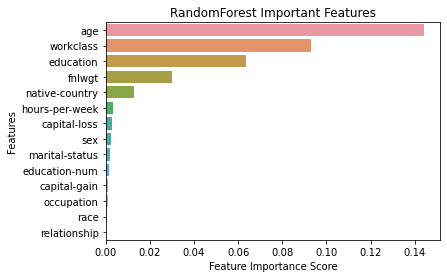

In [6]:
clf2 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf2.fit(X_train_encoded, y_train)

feat_rf = {} # a dict to hold feature_name: feature_importance
feat_labels = X.columns
for feature, importance in zip(feat_labels, clf2.feature_importances_):
    feat_rf[feature] = importance 
    
sort_feats_rf = sorted(feat_rf.items(), key=lambda x: x[1], reverse=True)

import operator
sorted_feat_rf = dict( sorted(feat_rf.items(), key=operator.itemgetter(1),reverse=True))

series1 = pd.Series(sorted_feat_rf)

import seaborn as sns
# Creating a bar plot
sns.barplot(x=series1, y=series1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("RandomForest Important Features")
plt.show()

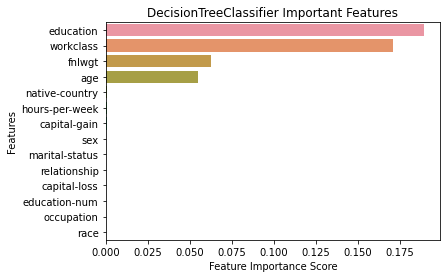

In [7]:
tree2 = DecisionTreeClassifier(max_depth=12, random_state=0)
tree2.fit(X_train_encoded, y_train)

feat_dc = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(feat_labels, tree2.feature_importances_):
    feat_dc[feature] = importance 

import operator
sorted_feat_dc = dict( sorted(feat_dc.items(), key=operator.itemgetter(1),reverse=True))

series2 = pd.Series(sorted_feat_dc)

# Creating a bar plot
sns.barplot(x=series2, y=series2.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("DecisionTreeClassifier Important Features")
plt.show()